* Author: Felix Cahyadi
* Date created: 12.10.2023

In [164]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
import pandas as pd

Now we are going to import the data

In [165]:
df = pd.read_csv('nmosfet_Fe_drainItot_Drain_vs_Date_Drain.csv', skiprows=7)
df = df[pd.to_numeric(df['Itot (A/Î¼m)'], errors='coerce').notnull()]
df.dropna()
df.astype(float)
df.head()


,Date (s),Itot (A/Î¼m)
0,0,4.631475e-16
1,1e-15,4.552663e-16
2,2e-15,4.728510e-16
3,3.2e-15,4.566239e-16
4,4.64e-15,4.691358e-16


In [166]:
I_dirty = np.array(df['Itot (A/Î¼m)'])
t_dirty = np.array(df['Date (s)'], dtype = np.float64)

Plot the data

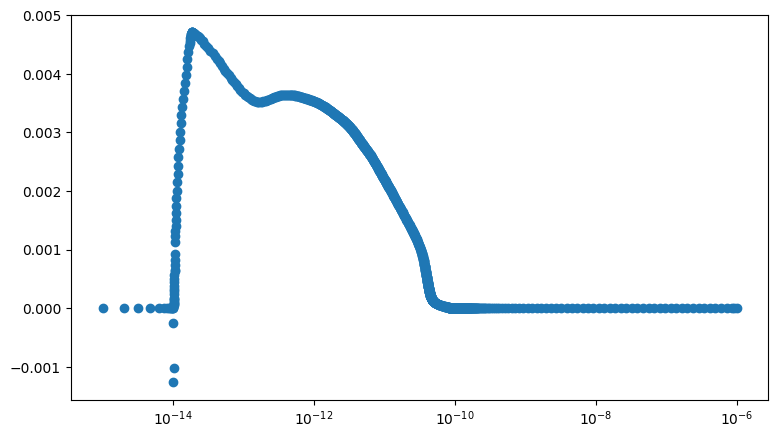

In [167]:
fig_dirty, ax_dirty = plt.subplots(figsize = (9,5))
ax_dirty.scatter(t_dirty,I_dirty)
ax_dirty.set_xscale('log')

We can see that the data is dirty, We need to clean the data first

In [168]:
I_clean = I_dirty.copy()
t_clean = t_dirty.copy()

I_clean[I_clean<0] = 0

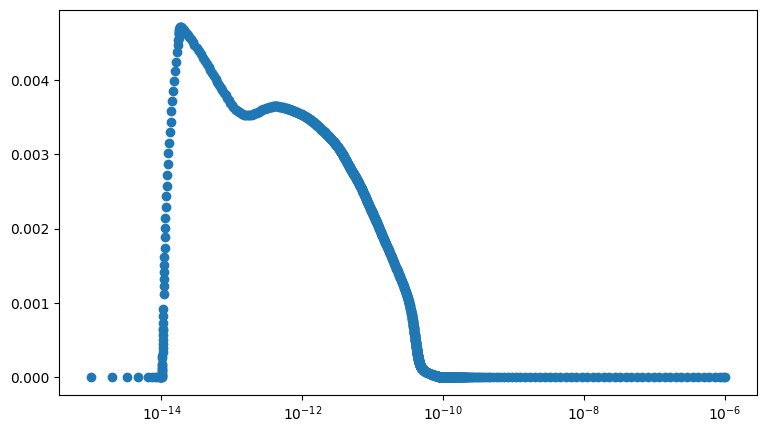

In [169]:
fig_clean, ax_clean = plt.subplots(figsize = (9,5))
ax_clean.scatter(t_clean,I_clean)
ax_clean.set_xscale('log')

We will now do an integration to acquire the accumulated charge

In [170]:
print(I_clean)

[4.63147477e-16 4.55266286e-16 4.72851035e-16 ... 4.66409107e-16
 4.66413164e-16 4.66409132e-16]


In [171]:
print(t_clean)

[0.00000e+00 1.00000e-15 2.00000e-15 ... 8.59044e-07 9.29522e-07
 1.00000e-06]


In [172]:
Q_clean = simpson(I_clean, t_clean)

In [173]:
print(f"The accumulated charge is {Q_clean} Coulomb")
print(f"It is about {(Q_clean/1.602e-19):.0f} elementary charge")

The accumulated charge is 7.281623199604477e-14 Coulomb
It is about 454533 elementary charge


Compare it to the dirty data

In [174]:
Q_dirty = simpson(I_dirty, t_dirty)

In [175]:
print(f"The accumulated charge is {Q_dirty} Coulomb/um")
print(f"It is about {(Q_dirty/1.602e-19):.0f} elementary charge")

The accumulated charge is 7.281333490505343e-14 Coulomb/um
It is about 454515 elementary charge
